we learned about probability distributions of discrete variables. Now it is time to move on to continuous variables, such as those that can take on any fractional value. Many of the principles are the same, but there are some subtleties.we will be speaking the probabilistic language you need to launch into the inference techniques covered in the sequel to this.

# Introduction to the Normal distribution


### The Normal PDF


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

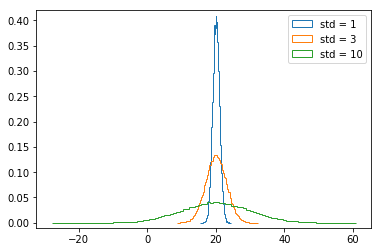

In [4]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


### The Normal CDF


In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

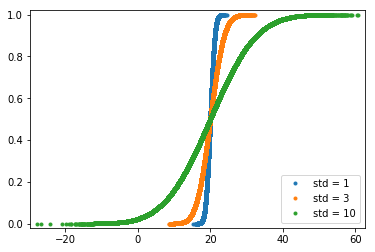

In [7]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


# The Normal distribution: Properties and warnings


In [9]:
belmont_no_outliers = np.array([ 148.51,  146.65,  148.52,  150.7 ,  150.42,  150.88,  151.57,
        147.54,  149.65,  148.74,  147.86,  148.75,  147.5 ,  148.26,
        149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
        152.02,  146.82,  149.97,  146.13,  148.1 ,  147.2 ,  146.  ,
        146.4 ,  148.2 ,  149.8 ,  147.  ,  147.2 ,  147.8 ,  148.2 ,
        149.  ,  149.8 ,  148.6 ,  146.8 ,  149.6 ,  149.  ,  148.2 ,
        149.2 ,  148.  ,  150.4 ,  148.8 ,  147.2 ,  148.8 ,  149.6 ,
        148.4 ,  148.4 ,  150.2 ,  148.8 ,  149.2 ,  149.2 ,  148.4 ,
        150.2 ,  146.6 ,  149.8 ,  149.  ,  150.8 ,  148.6 ,  150.2 ,
        149.  ,  148.6 ,  150.2 ,  148.2 ,  149.4 ,  150.8 ,  150.2 ,
        152.2 ,  148.2 ,  149.2 ,  151.  ,  149.6 ,  149.6 ,  149.4 ,
        148.6 ,  150.  ,  150.6 ,  149.2 ,  152.6 ,  152.8 ,  149.6 ,
        151.6 ,  152.8 ,  153.2 ,  152.4 ,  152.2 ])

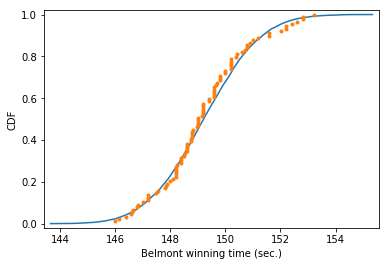

In [10]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


In [11]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.00062


# The Exponential distribution


In [12]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2


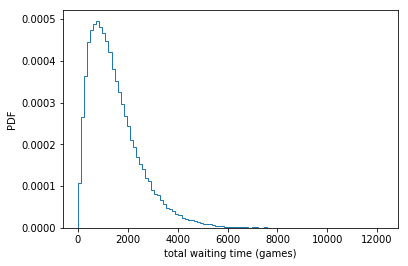

In [13]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step',
             normed=True)

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()
